In [1]:
import os
import numpy as np
from astropy import units as u 
from astropy import coordinates
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy

%matplotlib inline

### Read the output of <code>SExtractor</code>

We extract the source with threshold 3 sigma

In [2]:
def read_sexofile(filename = "file.cat"):
    pars = []
    # only get the header
    with open(filename, 'r') as ifile:
        for line in ifile:
            if line[0] == '#': 
                pars.append(line.split()[2])
    print 'Col names: ', pars
    
    # get the data
    data = np.genfromtxt(filename, names=pars) # already in np array
    
    return data

In [3]:
data = read_sexofile("J0423-0120_B7.cat")

Col names:  ['NUMBER', 'FLUX_ISO', 'FLUXERR_ISO', 'FLUX_AUTO', 'FLUXERR_AUTO', 'FLUX_BEST', 'FLUXERR_BEST', 'BACKGROUND', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_SKY', 'DELTA_SKY', 'ALPHA_J2000', 'DELTA_J2000']


In [4]:
ra, dec, flux = data['ALPHA_J2000'], data['DELTA_J2000'], data['FLUX_BEST']
label = data['NUMBER'].astype('int')

In [5]:
flux.min(), flux.max(), flux.mean()

(0.0038134369999999998, 0.1649378, 0.013258689493975902)

In [6]:
#mask = flux > flux.mean()
#ra, dec, flux, label = ra[mask], dec[mask], flux[mask], label[mask] 

### Read the fits file  (B7)

In [7]:
B7 = './images/J0423-0120_B7.fits'
rmsB7 = 5.3E-05

To make a contour in multiply of RMS

In [8]:
multp = np.array([2.5, 3, 3.5, 4.5, 5, 5.5, 6, 10, 100, 1000, 10000])
lvlB7 = rmsB7*multp

### Comparing the contour and SExtractor result

INFO: Setting slices=[0, 0] [aplpy.core]


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

INFO: Setting slices=[0, 0] [aplpy.core]


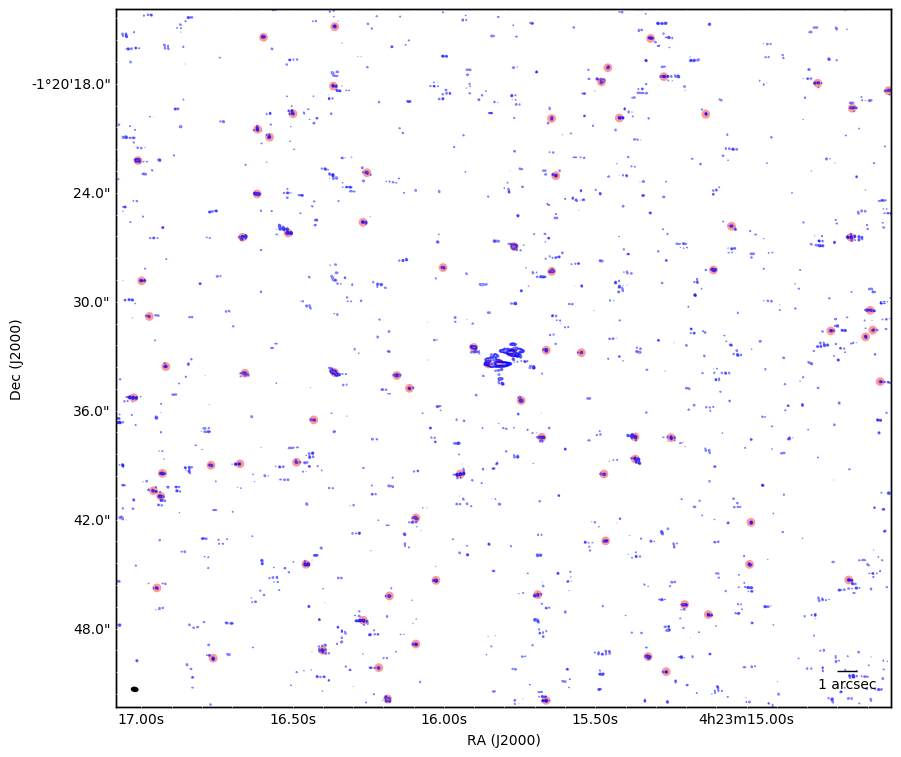

In [9]:
fig = aplpy.FITSFigure(B7)
fig.add_beam()
fig.beam.set_color('black')
fig.add_scalebar(1 * u.arcsecond)
fig.scalebar.set_label('1 arcsec')
fig.scalebar.set_color("black")

fig.show_contour(B7, colors='blue', levels=lvlB7, alpha=0.5)

#marker_size =  50 * flux/flux.max()
fig.show_markers(ra, dec, edgecolor='none', facecolor='red', marker='o', s=40, alpha=0.4)

#for i, lbl in enumerate(label): 
#    fig.add_label(ra[i], dec[i]-0.00032, lbl)

#fig.show_colorscale()

<code>SExtractor</code> works fine :)

### Comparing the contour with NED database

Query using <code>astroquery</code> around calibrator

In [10]:
from astroquery.ned import Ned

co = coordinates.SkyCoord(ra=65.81583637500, dec=-1.342518194444, unit=(u.deg, u.deg), frame='fk5')
result = Ned.query_region(co, radius=20*u.arcsec, equinox='J2000.0')

result

No.,Object Name,RA(deg),DEC(deg),Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Distance (arcmin),References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcm,,,,,,,
int32,str30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,[HB89] 0420-014 ABS01,65.815830000000005,-1.3424499999999999,AbLS,189769.0,0.63300000000000001,,,0.0040000000000000001,13,1,0,0,0,0,0
2,[HB89] 0420-014,65.815839999999994,-1.3425199999999999,QSO,274636.0,0.91608699999999998,,18.1b,0.0,599,12,172,36,15,0,0
3,[HB89] 0420-014:[YYW90] 59,65.816370000000006,-1.3418399999999999,VisS,--,--,,22.3,0.051999999999999998,1,0,0,0,0,0,0
4,[HB89] 0420-014:[YYW90] 06,65.817009999999996,-1.34782,VisS,--,--,,22.1,0.32600000000000001,1,0,0,0,0,0,0
5,[HB89] 0420-014:[YYW90] 05,65.817520000000002,-1.3462400000000001,VisS,--,--,,23.0,0.245,1,0,0,0,0,0,0
6,[HB89] 0420-014:[YYW90] 03,65.819370000000006,-1.3427199999999999,VisS,--,--,,19.80,0.21199999999999999,1,0,0,0,0,0,0


In [11]:
ra_ned = result['RA(deg)'].data.data # "mask-type" -_-
dec_ned = result['DEC(deg)'].data.data

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]


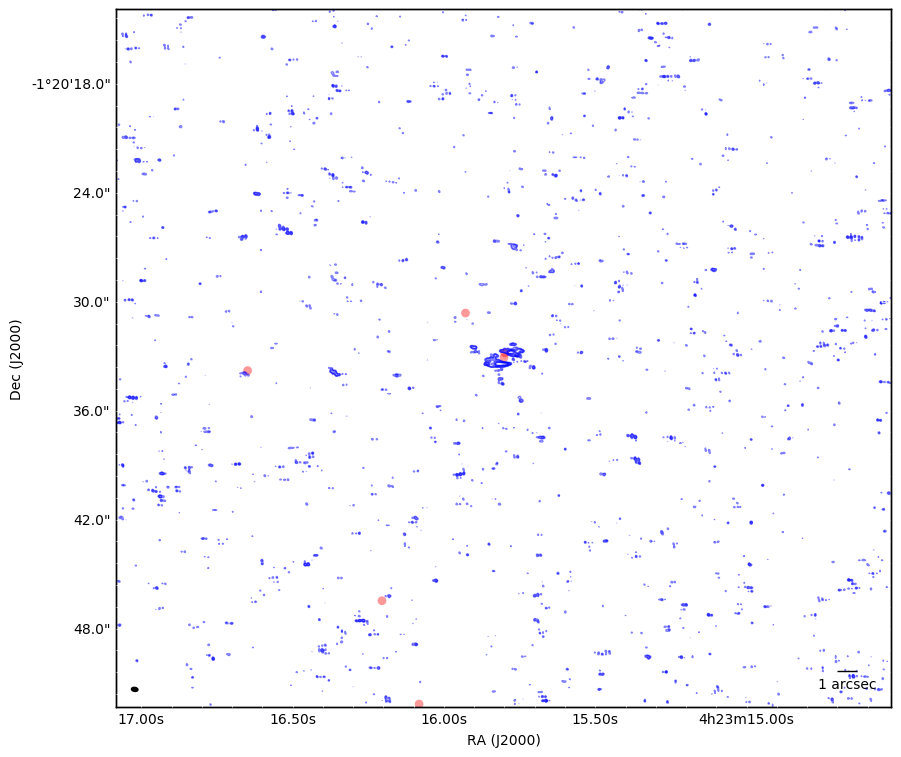

In [12]:
fig = aplpy.FITSFigure(B7)
fig.add_beam()
fig.beam.set_color('black')
fig.add_scalebar(1 * u.arcsecond)
fig.scalebar.set_label('1 arcsec')
fig.scalebar.set_color("black")

fig.show_contour(B7, colors='blue', levels=lvlB7, alpha=0.5)
fig.show_markers(ra_ned, dec_ned, edgecolor='none', facecolor='red', marker='o', s=40, alpha=0.4)
#fig.show_colorscale(cmap='hot')

- 1 source 'nearly-match' at the left side
- in here I just realise that actually at the center/calibrator, NED have 2 different objects listed. I don't know why. At the table there are AbLS (absorption line system, z = 0.63) and QSO (z = 0.916)